# Project 4: Predictive Modeling with scikit-learn

# Introduction
For this project I will be utilizing the UCI Mushroom Data Set to answer research questions and predict analysis.

This data comes from the https://archive.ics.uci.edu/ml/datasets/mushroom. A description of the dataset can be found https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names.

First I will import pandas, numpy, patsy, matplotlib, sklearn and seaborn.

In [1]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Summary
I will read the file into Jupyter by using the code provided in the assignment.

In [2]:
# To read the student-mat and get the DataFrame.
column_names = ['Class Distribution', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 
                                    'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
                                    'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
                                    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                                    'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
                                    'population', 'habitat']
mushrom_file = "https://raw.githubusercontent.com/Yuehao-Wang/AIM-5001/master/data/agaricus-lepiota.data"
mushrom_df = pd.read_csv(mushrom_file, names=column_names)

# To see the head of data set
mushrom_df.head(5)

,Class Distribution,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# To see data size
mushrom_df.shape

(8124, 23)

This data set has 8124 rows and 23 attributions.

In [4]:
# To see columns
mushrom_df.columns

Index(['Class Distribution', 'cap-shape', 'cap-surface', 'cap-color',
       'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
# To see data types
mushrom_df.dtypes

Class Distribution          object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Selecting Appropriate Plots
|column|data type| categore | chart |
| :--- | :--- | :--- | :--- |
|Class Distribution | object| Categorical |boxplot, barchar|
|cap-shape       | object| Categorical |boxplot, barchar|
|cap-surface       | object| Categorical |boxplot, barchar|
|cap-color       | object| Categorical |boxplot, barchar|
|bruises?       | object| Categorical |boxplot, barchar|
|odor       | object| Categorical |boxplot, barchar|
|gill-attachment       | object| Categorical |boxplot, barchar|
|gill-spacing       | object| Categorical |boxplot, barchar|
|gill-size       | object| Categorical |boxplot, barchar|
|gill-color       | object| Categorical |boxplot, barchar|
|stalk-shape       | object| Categorical |boxplot, barchar|
|stalk-root       | object| Categorical |boxplot, barchar|
|stalk-surface-above-ring       | object| Categorical |boxplot, barchar|
|stalk-surface-below-ring       | object| Categorical |boxplot, barchar|
|stalk-color-above-ring      | object| Categorical |boxplot, barchar|
|stalk-color-below-ring       | object| Categorical |boxplot, barchar|
|veil-type       | object| Categorical |boxplot, barchar|
|veil-color       | object| Categorical |boxplot, barchar|
|ring-number       | object| Categorical |boxplot, barchar|
|ring-type       | object| Categorical |boxplot, barchar|
|spore-print-color       | object| Categorical |boxplot, barchar|
|population       | object| Categorical |boxplot, barchar|
|habitat       | object| Categorical |boxplot, barchar|

### Attribution description

|column|description |
| :--- | :--- |
| 0. Class Distribution | e = edible: 4208 (51.8%), p = poisonous: 3916 (48.2%)|
| 1. cap-shape:                |bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s                                               |
| 2. cap-surface:              |fibrous=f,grooves=g,scaly=y,smooth=s                                                              |
| 3. cap-color:                |brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y                   |
| 4. bruises?:                 |bruises=t,no=f                                                                                    |
| 5. odor:                     |almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s                       |
| 6. gill-attachment:          |attached=a,descending=d,free=f,notched=n                                                          |
| 7. gill-spacing:             |close=c,crowded=w,distant=d                                                                       |
| 8. gill-size:                |broad=b,narrow=n                                                                                  |
| 9. gill-color:               |black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y |
|10. stalk-shape:              |enlarging=e,tapering=t                                                                            |
|11. stalk-root:               |bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?                                   |
|12. stalk-surface-above-ring: |fibrous=f,scaly=y,silky=k,smooth=s                                                                |
|13. stalk-surface-below-ring: |fibrous=f,scaly=y,silky=k,smooth=s                                                                |
|14. stalk-color-above-ring:   |brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y                           |
|15. stalk-color-below-ring:   |brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y                           |
|16. veil-type:                |partial=p,universal=u                                                                             |
|17. veil-color:               |brown=n,orange=o,white=w,yellow=y                                                                 |
|18. ring-number:              |none=n,one=o,two=t                                                                                |
|19. ring-type:                |cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z                     |
|20. spore-print-color:        |black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y                     |
|21. population:               |abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y                                |
|22. habitat:                  |grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d                                      |
    

In [6]:
# check null data
mushrom_df.isnull().sum()

Class Distribution          0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This data set does not have NaN value

# Exploratory Data Analysis (EDA)

First, I want to see the description of all columns.

In [7]:
# to see the description
mushrom_df.describe().T

,count,unique,top,freq
Class Distribution,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises?,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


The veil-type has only 1 attribute that is p with 8124.

The cap-color, gill-color has over 10 attributes.

Then, I want to see the count of attributes for each column, and the ratio of attributes for each column.

In [8]:
# To see the value
for i in range(len(mushrom_df.columns)):
    print(mushrom_df.iloc[:,i].value_counts())
    print('------------------------------------')

e    4208
p    3916
Name: Class Distribution, dtype: int64
------------------------------------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
------------------------------------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
------------------------------------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
------------------------------------
f    4748
t    3376
Name: bruises?, dtype: int64
------------------------------------
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
------------------------------------
f    7914
a     210
Name: gill-attachment, dtype: int64
------------------------------------
c    6812
w    1312
Name: gill-spacing, dtype: int64
------------------------------------
b    5612
n    2512
Name: gill-size, dtype: int64
------------------------------

Then, to see the ratio of attributes for each column

In [9]:
df_shape = mushrom_df.shape
for i in range(len(mushrom_df.columns)):
    g = mushrom_df.iloc[:,i].value_counts()
    
    print(column_names[i])
    for index, value in g.items():
        print("name : %s, count : %d , ratio : %.4f" %(index, value, value / df_shape[0]))
    print("----------------")

Class Distribution
name : e, count : 4208 , ratio : 0.5180
name : p, count : 3916 , ratio : 0.4820
----------------
cap-shape
name : x, count : 3656 , ratio : 0.4500
name : f, count : 3152 , ratio : 0.3880
name : k, count : 828 , ratio : 0.1019
name : b, count : 452 , ratio : 0.0556
name : s, count : 32 , ratio : 0.0039
name : c, count : 4 , ratio : 0.0005
----------------
cap-surface
name : y, count : 3244 , ratio : 0.3993
name : s, count : 2556 , ratio : 0.3146
name : f, count : 2320 , ratio : 0.2856
name : g, count : 4 , ratio : 0.0005
----------------
cap-color
name : n, count : 2284 , ratio : 0.2811
name : g, count : 1840 , ratio : 0.2265
name : e, count : 1500 , ratio : 0.1846
name : y, count : 1072 , ratio : 0.1320
name : w, count : 1040 , ratio : 0.1280
name : b, count : 168 , ratio : 0.0207
name : p, count : 144 , ratio : 0.0177
name : c, count : 44 , ratio : 0.0054
name : u, count : 16 , ratio : 0.0020
name : r, count : 16 , ratio : 0.0020
----------------
bruises?
name : f, 

Then, to draw bar charts to illustrate each columns

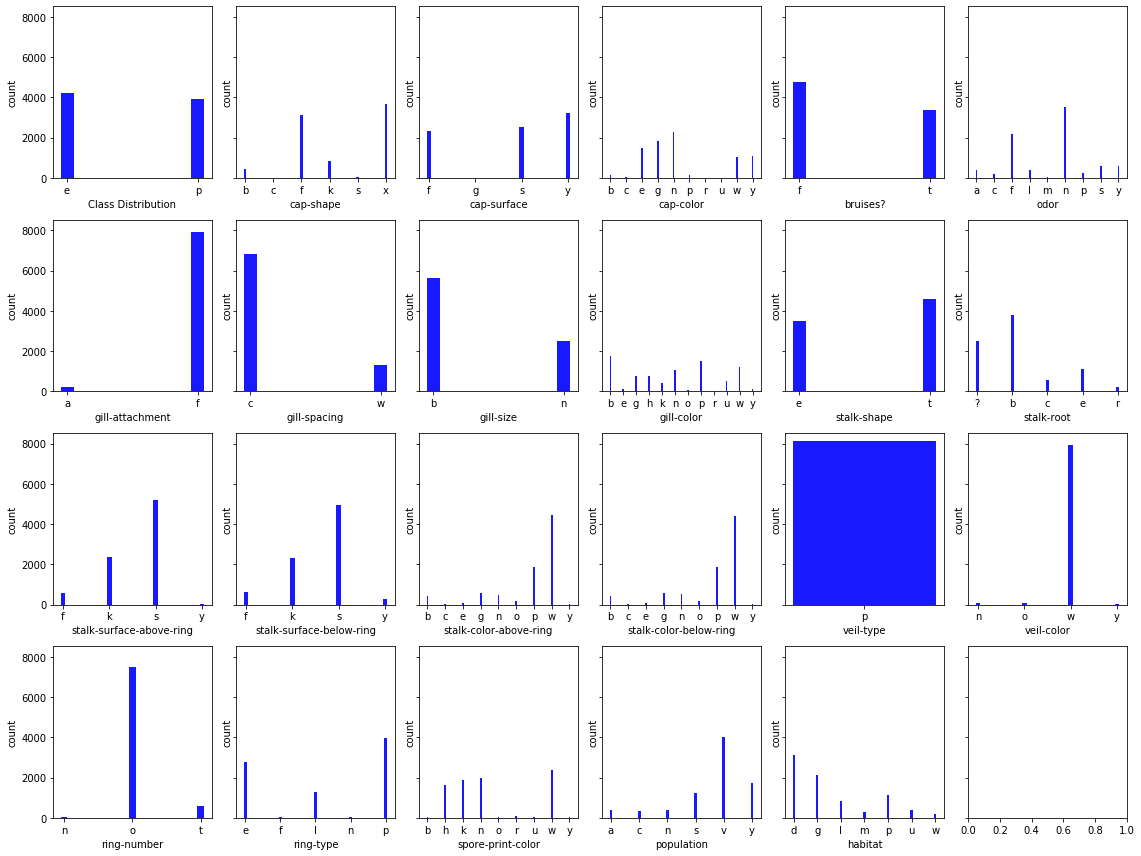

In [10]:
def groupby_column_size(g_series, ax, title):
    bar_names = g_series.index
    bar_values = g_series.values
    X = np.arange(len(bar_values))
    width=0.1

    # to draw a bar chart
    ax.bar(X, bar_values, alpha=0.9, width = width, color='blue')
    
    # to set x and y axis label
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    
    # the ticks of x axis
    ax.set_xticks(X)

    # the label of each group
    ax.set_xticklabels(bar_names)
    
def mushroom_column_groupby_bar():
    """
    To draw bar charts for all columns.

    Input parameters:
      none.

    Returns:
      null.

    Raises:
      none
    """
    
    # Create 24 subplots and unpack the output array immediately
    fig, axsubs = plt.subplots(4, 6, sharey=True, figsize=(16, 12))

    # To draw bar chart and best fit line
    groupby_column_size(mushrom_df.groupby(column_names[0]).size(), axsubs[0, 0], column_names[0])
    groupby_column_size(mushrom_df.groupby(column_names[1]).size(), axsubs[0, 1], column_names[1])
    groupby_column_size(mushrom_df.groupby(column_names[2]).size(), axsubs[0, 2], column_names[2])
    groupby_column_size(mushrom_df.groupby(column_names[3]).size(), axsubs[0, 3], column_names[3])
    groupby_column_size(mushrom_df.groupby(column_names[4]).size(), axsubs[0, 4], column_names[4])
    groupby_column_size(mushrom_df.groupby(column_names[5]).size(), axsubs[0, 5], column_names[5])
    
    groupby_column_size(mushrom_df.groupby(column_names[6]).size(), axsubs[1, 0], column_names[6])
    groupby_column_size(mushrom_df.groupby(column_names[7]).size(), axsubs[1, 1], column_names[7])
    groupby_column_size(mushrom_df.groupby(column_names[8]).size(), axsubs[1, 2], column_names[8])
    groupby_column_size(mushrom_df.groupby(column_names[9]).size(), axsubs[1, 3], column_names[9])
    groupby_column_size(mushrom_df.groupby(column_names[10]).size(), axsubs[1, 4], column_names[10])
    groupby_column_size(mushrom_df.groupby(column_names[11]).size(), axsubs[1, 5], column_names[11])
    
    groupby_column_size(mushrom_df.groupby(column_names[12]).size(), axsubs[2, 0], column_names[12])
    groupby_column_size(mushrom_df.groupby(column_names[13]).size(), axsubs[2, 1], column_names[13])
    groupby_column_size(mushrom_df.groupby(column_names[14]).size(), axsubs[2, 2], column_names[14])
    groupby_column_size(mushrom_df.groupby(column_names[15]).size(), axsubs[2, 3], column_names[15])
    groupby_column_size(mushrom_df.groupby(column_names[16]).size(), axsubs[2, 4], column_names[16])
    groupby_column_size(mushrom_df.groupby(column_names[17]).size(), axsubs[2, 5], column_names[17])
    
    groupby_column_size(mushrom_df.groupby(column_names[18]).size(), axsubs[3, 0], column_names[18])
    groupby_column_size(mushrom_df.groupby(column_names[19]).size(), axsubs[3, 1], column_names[19])
    groupby_column_size(mushrom_df.groupby(column_names[20]).size(), axsubs[3, 2], column_names[20])
    groupby_column_size(mushrom_df.groupby(column_names[21]).size(), axsubs[3, 3], column_names[21])
    groupby_column_size(mushrom_df.groupby(column_names[22]).size(), axsubs[3, 4], column_names[22])


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

# To call mat_school_gender_hist to show picture
mushroom_column_groupby_bar()

From the above description and bar charts, one thing observed from the database was the “veil-type” has only one value. The "gill-attachment", "veil-color", and "ring-number" has one value that accounts for most percentage. The "Class Distribution" showed that 51.8% of mushroom is edible and 48.2% of mushroom is poisonous.

# Data Preparation

- To get a sub dataframe
- Add meaningful names for each column in the DataFrame you created to store your subset.
- Convert the “e”/”p” indicators in the first column to digits: for example, the “e” might become 0 and “p” might become 1
- For each of the other columns in your DataFrame create a set of dummy variables. 
- Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show plots for edible/poisonous vs. odor as well as the other columns that you selected.
- Include some text describing your preliminary conclusions about whether any of the other columns you’ve included in your subset (i.e., aside from the poisonous/edible indicator) could be helpful in predicting if a specific mushroom is edible or poisonous.

First, I'm going to get a sub-dataset and to see the detail data of it.

In [11]:
# To copy all columns from original mushrom_df, and to get a sub_df
sub_df = mushrom_df[['Class Distribution', 'cap-shape', 'odor', 'habitat', 'stalk-root']].copy()
sub_df.head(3)

,Class Distribution,cap-shape,odor,habitat,stalk-root
0,p,x,p,u,e
1,e,x,a,g,c
2,e,b,l,m,c


In [12]:
# To see the description
sub_df.describe()

,Class Distribution,cap-shape,odor,habitat,stalk-root
count,8124,8124,8124,8124,8124
unique,2,6,9,7,5
top,e,x,n,d,b
freq,4208,3656,3528,3148,3776


The Class Distribution has 2 categories. The cap-shape has 6 categories. The odor has 9 categories. The habitat has 7 categories. The stalk-root has 5 categories.

Then, I'm going to see the ratio of attributes for each column.

In [13]:
# To show the ratio of attributes for each column.
df_shape = mushrom_df.shape
for i in range(len(sub_df.columns)):
    g = sub_df.iloc[:,i].value_counts()
    sub_col_names = sub_df.columns
    
    print(sub_col_names[i])
    for index, value in g.items():
        print("name : %s, count : %d , ratio : %.4f" %(index, value, value / df_shape[0]))
    print("----------------")

Class Distribution
name : e, count : 4208 , ratio : 0.5180
name : p, count : 3916 , ratio : 0.4820
----------------
cap-shape
name : x, count : 3656 , ratio : 0.4500
name : f, count : 3152 , ratio : 0.3880
name : k, count : 828 , ratio : 0.1019
name : b, count : 452 , ratio : 0.0556
name : s, count : 32 , ratio : 0.0039
name : c, count : 4 , ratio : 0.0005
----------------
odor
name : n, count : 3528 , ratio : 0.4343
name : f, count : 2160 , ratio : 0.2659
name : s, count : 576 , ratio : 0.0709
name : y, count : 576 , ratio : 0.0709
name : l, count : 400 , ratio : 0.0492
name : a, count : 400 , ratio : 0.0492
name : p, count : 256 , ratio : 0.0315
name : c, count : 192 , ratio : 0.0236
name : m, count : 36 , ratio : 0.0044
----------------
habitat
name : d, count : 3148 , ratio : 0.3875
name : g, count : 2148 , ratio : 0.2644
name : p, count : 1144 , ratio : 0.1408
name : l, count : 832 , ratio : 0.1024
name : u, count : 368 , ratio : 0.0453
name : m, count : 292 , ratio : 0.0359
name 

Then, I'm going to draw bar charts to illustrate each columns.

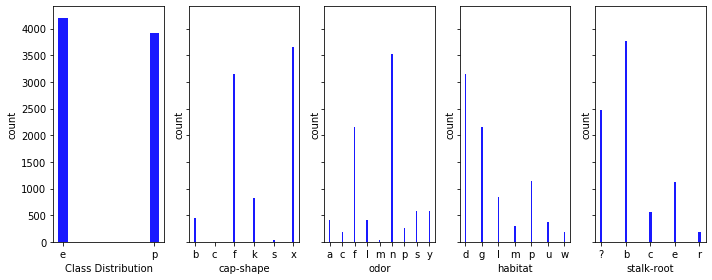

In [14]:
# show the bar chart
def sub_column_groupby_bar():
    """
    To draw bar charts for sub dataset columns.

    Input parameters:
      none.

    Returns:
      null.

    Raises:
      none
    """
    
    # Create 4 subplots and unpack the output array immediately
    fig, axsubs = plt.subplots(1, 5, sharey=True, figsize=(10, 4))

    # To draw bar chart
    groupby_column_size(sub_df.groupby(['Class Distribution']).size(), axsubs[0], 'Class Distribution')
    groupby_column_size(sub_df.groupby(['cap-shape']).size(), axsubs[1], 'cap-shape')
    groupby_column_size(sub_df.groupby(['odor']).size(), axsubs[2], 'odor')
    groupby_column_size(sub_df.groupby(['habitat']).size(), axsubs[3], 'habitat')
    groupby_column_size(sub_df.groupby(['stalk-root']).size(), axsubs[4], 'stalk-root')


    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

# To call sub_column_groupby_bar to show picture
sub_column_groupby_bar()

From the above description and bar charts, one thing observed from the database was the "Class Distribution" showed that 51.8% of mushroom is edible and 48.2% of mushroom is poisonous. The percentage of convex-cap-shape and flat-cap-shape are 45% and 38.8%. 43.43% of odor is none and others have odor. The top 3 habitats are woods, grasses and paths with 38.75%, 26.44% and 14.08% respectively. 46.48% of stalk-root is bulbous and 30.53% of stalk-root is ? (unknown).

#  Preliminary conclusions of sub dataset
The dataset shows that 48.2% of mushroom is poisonous. The convex cap shape mushroom might help predict be edible. None-odor mushroom might help predict be edible. Mushrrom that lives in woods might help predict be edible. The missing data of stalk-root might help predict be poisonous.

# Using SK-Learn to predict edible or poisonous mushroom.

First, Choosing the Class Distribution column as target Y. Because there are e and p in this column, I will use 0 to present e(edible) and 1 to resent p(poisonous).

In [15]:
# To convert the "e/p" to e = 0, p = 1
class_mapping = {'e':0,'p':1}
sub_df['Class Distribution'] = sub_df['Class Distribution'].map(class_mapping)
sub_df.head(3)

,Class Distribution,cap-shape,odor,habitat,stalk-root
0,1,x,p,u,e
1,0,x,a,g,c
2,0,b,l,m,c


Bacause, all value are character, I will using pandas.get_dummies() to change character to 0 or 1.

In [16]:
# To get dummy variables.
sub_dummy_df = pd.get_dummies(sub_df)
sub_dummy_df.head(3)

,Class Distribution,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Task 2 Using LogisticRegression to predict mushroom

I will choose the five columns (['Class Distribution', 'cap-shape', 'odor', 'habitat', 'stalk-root'])

In [17]:
sub_df.head(3)

,Class Distribution,cap-shape,odor,habitat,stalk-root
0,1,x,p,u,e
1,0,x,a,g,c
2,0,b,l,m,c


To choose dummy values of cap-shape, odor, habitat and stalk-root as X.

In [18]:
# To choose dataset of X
mushroom_X = sub_dummy_df.iloc[:,1:]
mushroom_X.head(3)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,odor_l,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


To choose dummy values of Class Distribution as y.

In [19]:
# to choose dataset of Y
mushroom_y = sub_dummy_df.iloc[:,0]
mushroom_y.head(3)

0    1
1    0
2    0
Name: Class Distribution, dtype: int64

Then to split dataset to train set and test set

In [20]:
# To split train set and test set
x_train,x_test,y_train,y_test = train_test_split(mushroom_X, mushroom_y,test_size=0.3)

In [21]:
x_train.head(3)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,odor_l,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
2062,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1361,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7161,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
x_test.head(3)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,odor_a,odor_c,odor_f,odor_l,...,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r
4700,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
7952,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1799,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
y_train.head(3)

2062    0
1361    1
7161    1
Name: Class Distribution, dtype: int64

In [24]:
y_test.head(3)

4700    1
7952    0
1799    0
Name: Class Distribution, dtype: int64

Then using LogisticRegression to predict

In [25]:
from sklearn.linear_model import LogisticRegression
mushroom_lr = LogisticRegression()
result = mushroom_lr.fit(x_train,y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The trainning has been done.

Then we can see the score of trainning set.

In [26]:
print("The socre of train set is {}".format(mushroom_lr.score(x_train,y_train)))

The socre of train set is 0.9876890608512136


To see the score of test set.

In [27]:
print("The socre of test set is {}".format(mushroom_lr.score(x_test,y_test)))

The socre of test set is 0.9876948318293683


The socre of test set is very close to the socre of train set. This modle can be used to predict whether a mushroom is edible or poisonous.

Then to illustrate the model coefficients for the explanatory variables

In [28]:
# examine the model coefficients for the explanatory variables
print(sub_dummy_df.columns[1:])
mushroom_lr.coef_

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r'],
      dtype='object')


array([[ 0.23179488,  2.46530142, -0.60167927, -0.32474133, -0.36236203,
        -1.40919091, -6.06374526,  2.45227979,  3.66598073, -6.02760916,
         2.52475476, -5.57027968,  3.36913007,  2.86328438,  2.78532712,
        -0.94530258,  0.11026561, -0.16405987,  2.14774493, -0.06735155,
         0.5889672 , -1.67114098,  1.13760746,  1.54774826, -1.03076673,
        -0.96945243, -0.68601379]])

In [29]:
# To see all coefficients
coefs = pd.DataFrame(
    mushroom_lr.coef_,
    columns=sub_dummy_df.columns[1:], index=['Coefficients']
)

coefs.T

,Coefficients
cap-shape_b,0.231795
cap-shape_c,2.465301
cap-shape_f,-0.601679
cap-shape_k,-0.324741
cap-shape_s,-0.362362
cap-shape_x,-1.409191
odor_a,-6.063745
odor_c,2.452280
odor_f,3.665981
odor_l,-6.027609


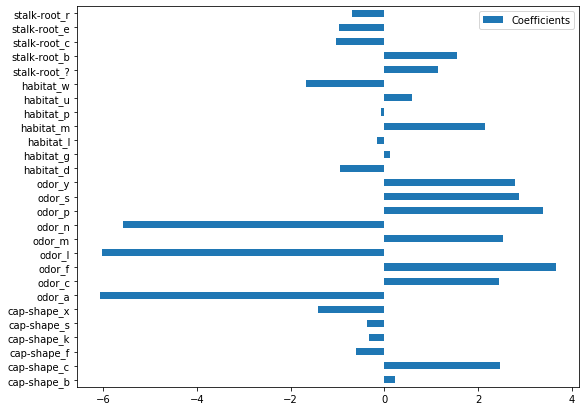

In [30]:
# To draw a bar chat to illustrate the coefficients
coefs.T.plot(kind='barh', figsize=(9, 7))

In [31]:
# generate predictions for the test data using our new model
y_predict = mushroom_lr.predict(x_test)
y_predict[:10]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [32]:
# To compare the test set of Y
y_test[:10]

4700    1
7952    0
1799    0
4953    1
3151    0
5301    1
7753    0
6898    1
3441    1
1190    0
Name: Class Distribution, dtype: int64

The predict set and test set are very much alike.

# Summary

From the above tables and bar chart, we see that:


- The odor has the most accurately predicts in Odor, stalk-root, habitat and cap-shape.


- Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
    - The almond, anise and none odor, the less likely mushroom was poisonous. 
    - The foul, pungent and fishy, the more likely mushroom was poisonous.
    
    
- stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    - The rooted, equal and club stalk-root, the less likely mushroom was poisonous
    - The bulbous and missing stalk-root, the more likely mushroom was poisonous


- habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
    - The waste, paths and woods habitat, the less likely mushroom was poisonous
    - The urban, meadows, leaves and grasses habitat, the more likely mushroom was poisonous
    

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    - The convex, flat, knobbed and sunken odor cap-shape, the less likely mushroom was poisonous. 
    - The conical and bell cap-shape, the more likely mushroom was poisonous.
